GPT 4


In [1]:
import numpy as np

data = [(-12, 3508773764.33), (0, 8.23), (-3, -1817.19), (-9, 223172941.89), 
        (-14, 14972489218.13), (20, -616038985298.39), (15, -46647273946.87), 
        (-13, 7219976272.81), (-6, 3834402.29), (9, -568338726.84), 
        (-16, 53374816586.25), (-17, 91848086984.74), (19, -406415090728.42), 
        (17, -140585922641.56), (-10, 587827177.29), (11, -3241624198.39), 
        (-4, 26305.61), (4, -556869.05), (-19, 253537431975.71)]

x_values = [point[0] for point in data]
y_values = [point[1] for point in data]


In [2]:
coefficients_ols = np.polyfit(x_values, y_values, 10)


In [3]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Transform our x data to polynomial features
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(np.array(x_values).reshape(-1, 1))

ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_poly, y_values)
coefficients_ridge = ridge.coef_


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.61234e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


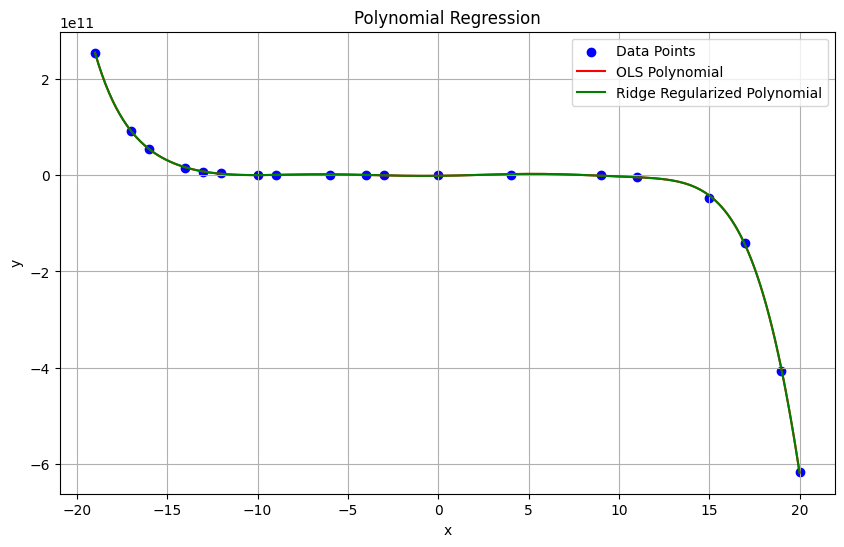

In [4]:
import matplotlib.pyplot as plt

# Generate x values for plotting
x_plot = np.linspace(min(x_values), max(x_values), 400)

# Generate y values for OLS polynomial
y_ols = np.polyval(coefficients_ols, x_plot)

# Generate y values for Ridge polynomial
X_plot_poly = poly.transform(x_plot.reshape(-1, 1))
y_ridge = ridge.predict(X_plot_poly)

plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_plot, y_ols, color='red', label='OLS Polynomial')
plt.plot(x_plot, y_ridge, color='green', label='Ridge Regularized Polynomial')
plt.legend()
plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


Revised Code

In [6]:
import numpy as np

data = [(-12, 3508773764.33), (0, 8.23), (-3, -1817.19), (-9, 223172941.89), 
        (-14, 14972489218.13), (20, -616038985298.39), (15, -46647273946.87), 
        (-13, 7219976272.81), (-6, 3834402.29), (9, -568338726.84), 
        (-16, 53374816586.25), (-17, 91848086984.74), (19, -406415090728.42), 
        (17, -140585922641.56), (-10, 587827177.29), (11, -3241624198.39), 
        (-4, 26305.61), (4, -556869.05), (-19, 253537431975.71)]

x_values = [point[0] for point in data]
y_values = [point[1] for point in data]


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(np.array(x_values).reshape(-1, 1))


In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10)
X_poly_scaled = poly.fit_transform(x_scaled)


In [9]:
coefficients_ols = np.polyfit(x_values, y_values, 10)


In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100.0)  # Adjusted regularization strength
ridge.fit(X_poly_scaled, y_values)
coefficients_ridge_scaled = ridge.coef_


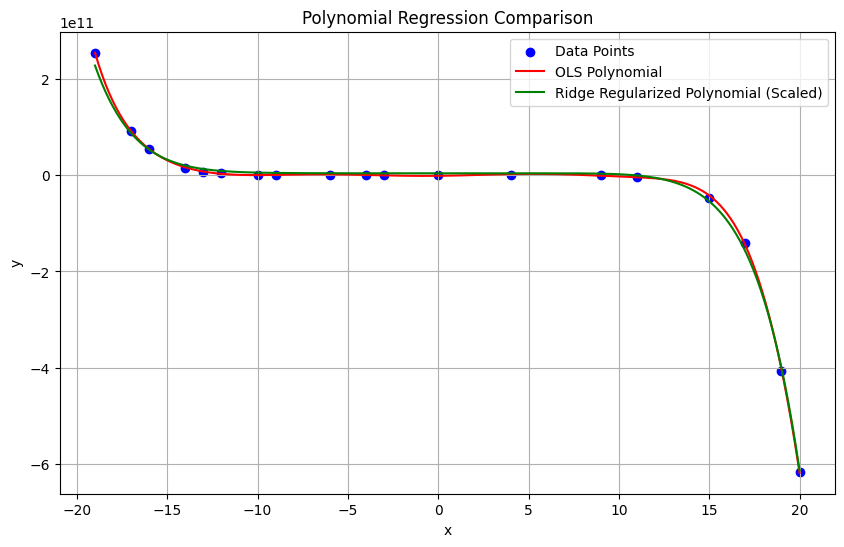

In [11]:
import matplotlib.pyplot as plt

# Generate x values for plotting
x_plot = np.linspace(min(x_values), max(x_values), 400)
x_plot_scaled = scaler.transform(x_plot.reshape(-1, 1))
X_plot_poly_scaled = poly.transform(x_plot_scaled)

# Generate y values for OLS polynomial
y_ols = np.polyval(coefficients_ols, x_plot)

# Generate y values for Ridge polynomial with scaled features
y_ridge_scaled = ridge.predict(X_plot_poly_scaled)

plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_plot, y_ols, color='red', label='OLS Polynomial')
plt.plot(x_plot, y_ridge_scaled, color='green', label='Ridge Regularized Polynomial (Scaled)')
plt.legend()
plt.title('Polynomial Regression Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


Step 1: Organize the Data

In [15]:
data = [(-12, 3508773764.33), (0, 8.23), (-3, -1817.19), (-9, 223172941.89), 
        (-14, 14972489218.13), (20, -616038985298.39), (15, -46647273946.87), 
        (-13, 7219976272.81), (-6, 3834402.29), (9, -568338726.84), 
        (-16, 53374816586.25), (-17, 91848086984.74), (19, -406415090728.42), 
        (17, -140585922641.56), (-10, 587827177.29), (11, -3241624198.39), 
        (-4, 26305.61), (4, -556869.05), (-19, 253537431975.71)]
x_values = [point[0] for point in data]
y_values = [point[1] for point in data]


Step 2: Construct the Design Matrix X
We'll use the PolynomialFeatures class from sklearn to generate the design matrix for our polynomial regression.

In [16]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10)
X = poly.fit_transform(np.array(x_values).reshape(-1, 1))


Step 3: OLS Estimation


In [17]:
XTX_inv = np.linalg.inv(np.dot(X.T, X))
XTy = np.dot(X.T, y_values)
coefficients_ols = np.dot(XTX_inv, XTy)


Step 4: Ridge Regression Solution

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1e10)  # Setting a regularization strength
ridge.fit(X, y_values)
coefficients_ridge = ridge.coef_


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.50386e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Visualisation

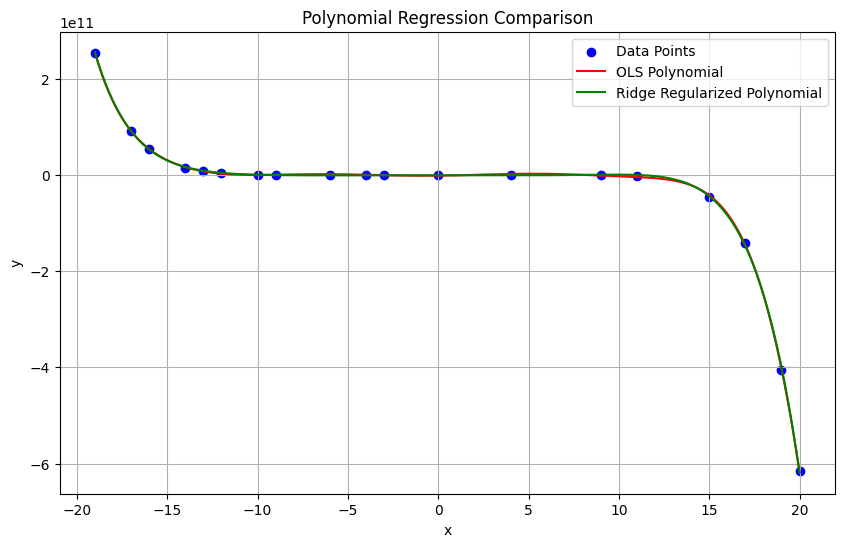

In [19]:
import matplotlib.pyplot as plt

x_plot = np.linspace(min(x_values), max(x_values), 400)
X_plot = poly.transform(x_plot.reshape(-1, 1))
y_ols_plot = np.dot(X_plot, coefficients_ols)
y_ridge_plot = ridge.predict(X_plot)

plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_plot, y_ols_plot, color='red', label='OLS Polynomial')
plt.plot(x_plot, y_ridge_plot, color='green', label='Ridge Regularized Polynomial')
plt.legend()
plt.title('Polynomial Regression Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


Ineffective Sol

In [1]:
import numpy as np

# Given data points
x_values = [-12, 0, -3, -9, -14, 20, 15, -13, -6, 9, -16, -17, 19, 17, -10, 11, -4, 4, -19]
y_values = [3508773764.33, 8.23, -1817.19, 223172941.89, 14972489218.13, -616038985298.39, -46647273946.87, 7219976272.81, 3834402.29, -568338726.84, 53374816586.25, 91848086984.74, -406415090728.42, -140585922641.56, 587827177.29, -3241624198.39, 26305.61, -556869.05, 253537431975.71]

# Constructing the design matrix X
X = np.vander(x_values, N=11, increasing=True)


In [2]:
# OLS Estimation
alpha_ols = np.linalg.inv(X.T @ X) @ X.T @ y_values


In [3]:
lambda_value = 1
identity_matrix = np.identity(X.shape[1])
alpha_ridge = np.linalg.inv(X.T @ X + lambda_value * identity_matrix) @ X.T @ y_values


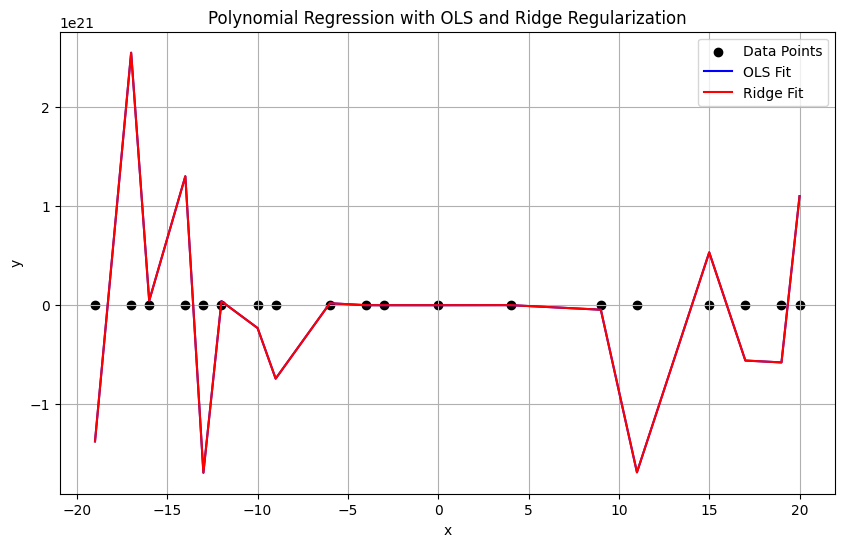

In [4]:
import matplotlib.pyplot as plt

# Predicted values
y_pred_ols = X @ alpha_ols
y_pred_ridge = X @ alpha_ridge

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='black', label='Data Points')
plt.plot(sorted(x_values), [y for _,y in sorted(zip(x_values,y_pred_ols))], color='blue', label='OLS Fit')
plt.plot(sorted(x_values), [y for _,y in sorted(zip(x_values,y_pred_ridge))], color='red', label='Ridge Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression with OLS and Ridge Regularization')
plt.grid(True)
plt.show()


Final SOl

In [6]:
import numpy as np

data = [(-12, 3508773764.33), (0, 8.23), (-3, -1817.19), (-9, 223172941.89), 
        (-14, 14972489218.13), (20, -616038985298.39), (15, -46647273946.87), 
        (-13, 7219976272.81), (-6, 3834402.29), (9, -568338726.84), 
        (-16, 53374816586.25), (-17, 91848086984.74), (19, -406415090728.42), 
        (17, -140585922641.56), (-10, 587827177.29), (11, -3241624198.39), 
        (-4, 26305.61), (4, -556869.05), (-19, 253537431975.71)]
        
x_values = np.array([point[0] for point in data]).reshape(-1, 1)
y_values = np.array([point[1] for point in data])


In [7]:
from sklearn.preprocessing import PolynomialFeatures

degree = 10
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(x_values)


In [8]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression(fit_intercept=False)
ols.fit(X_poly, y_values)
coefficients_ols = ols.coef_


In [9]:
from sklearn.linear_model import Ridge

ridge_alpha = 1.0
ridge = Ridge(alpha=ridge_alpha, fit_intercept=False)
ridge.fit(X_poly, y_values)
coefficients_ridge = ridge.coef_


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.18029e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [11]:
print("OLS Coefficients:", coefficients_ols)


OLS Coefficients: [-1.58475488e+09  4.02222831e+08  2.50214732e+08 -1.34221532e+07
 -5.76609290e+06  1.28666085e+05  4.63060371e+04 -4.32320340e+02
 -1.51827314e+02 -5.45600474e-01  1.61161900e-01]


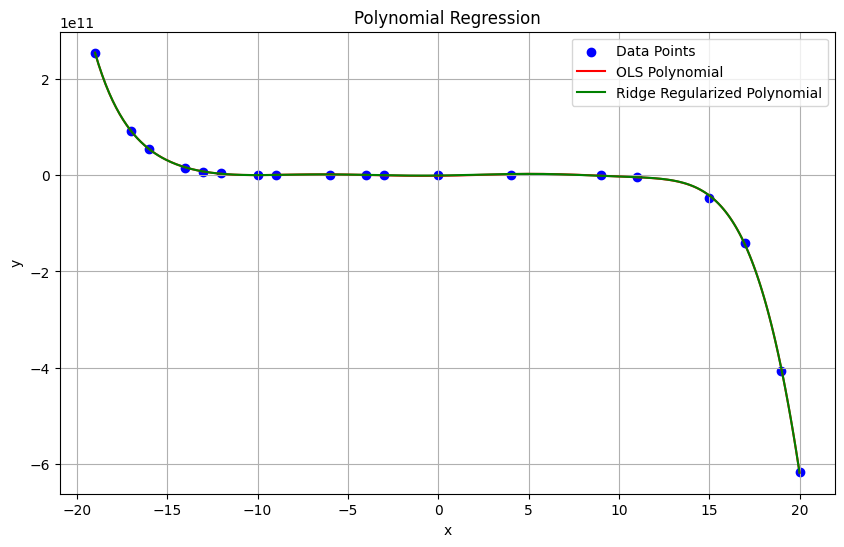

In [10]:
import matplotlib.pyplot as plt

# Generate x values for plotting
x_plot = np.linspace(min(x_values), max(x_values), 400).reshape(-1, 1)
X_plot_poly = poly.transform(x_plot)

# Predict y values
y_ols = ols.predict(X_plot_poly)
y_ridge = ridge.predict(X_plot_poly)

# Plotting
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_plot, y_ols, color='red', label='OLS Polynomial')
plt.plot(x_plot, y_ridge, color='green', label='Ridge Regularized Polynomial')
plt.legend()
plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Given data
data = [(-12, 3508773764.33), (0, 8.23), (-3, -1817.19), (-9, 223172941.89), 
        (-14, 14972489218.13), (20, -616038985298.39), (15, -46647273946.87), 
        (-13, 7219976272.81), (-6, 3834402.29), (9, -568338726.84), 
        (-16, 53374816586.25), (-17, 91848086984.74), (19, -406415090728.42), 
        (17, -140585922641.56), (-10, 587827177.29), (11, -3241624198.39), 
        (-4, 26305.61), (4, -556869.05), (-19, 253537431975.71)]
x_values = np.array([point[0] for point in data]).reshape(-1, 1)
y_values = np.array([point[1] for point in data])

# Polynomial Feature Transformation
degree = 10
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(x_values)

# Ridge Regularized Polynomial Regression (with mild regularization)
ridge_alpha_mild = 0.1
ridge_mild = Ridge(alpha=ridge_alpha_mild, fit_intercept=False)
ridge_mild.fit(X_poly, y_values)

# Ridge Regularized Polynomial Regression (with stronger regularization)
ridge_alpha_strong = 1000
ridge_strong = Ridge(alpha=ridge_alpha_strong, fit_intercept=False)
ridge_strong.fit(X_poly, y_values)

# Visualization
x_plot = np.linspace(min(x_values), max(x_values), 400).reshape(-1, 1)
X_plot_poly = poly.transform(x_plot)

y_ridge_mild = ridge_mild.predict(X_plot_poly)
y_ridge_strong = ridge_strong.predict(X_plot_poly)

plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_plot, y_ridge_mild, color='red', label=f'Ridge (alpha={ridge_alpha_mild})')
plt.plot(x_plot, y_ridge_strong, color='green', label=f'Ridge (alpha={ridge_alpha_strong})')
plt.legend()
plt.title('Polynomial Regression with Ridge Regularization')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
